In [ ]:
# Name - Anuj Kumar Tahlan
# Student ID - 21252775
# Maynooth University, 
# Msc. Computer Science (Software Engineering)
# Session 2021-2022

In [ ]:
# Project - Traffic Sign Recognition (Contains two subparts: Detection and Classification)
# This is Part 1(a) of the Project: It is called, Traffic Sign Detection ( Complete Code : Training and Testing )

#If you want to only test the model for already trained YOLOv4 model, refer to my testing code in Part 1(b). Link provided below.

#Repository Link for all files - https://github.com/anuj-tahlan/Traffic_Sign_Recognition.git

# Other Parts of this Project :
# Part 1(b) of the Project - Testing Traffic Sign Detection (Testing the Trained Model)
# code file name - Testing_Model_Traffic_Sign_Detection_Using_Yolo.ipynb

# Part 2(a) of the Project - Traffic Sign Classification full code (Training and Testing)
# code file name - Traffic_Signal_Classification(Training and Testing).ipynb

# Part 2(b) - Testing Traffic Sign Classification (Testing the trained model)
# code file - Testing_Traffic_Sign_Classification_Model.ipynb

In [ ]:
# Traffic Sign Detection model can only detect and categorise the traffic signs in one of the four major classes.
# Prohibitory , Danger , Mandatory and others.
# To sub classify the classes into one of the 43 subclasses such as speed limit 20km/h, left turn ahead, No entry etc,
# Refer to the Part 2(a) and Part 2(b) of the Project.
# The idea is once the traffic signs are detected,from the original image, 
# they are then cropped out and fed as input to the classification model. The transition is however not shown in this project, that is a future scope.
# Thus, to test the classification model, manually cropped traffic signs must be used and for Detecting any traffic scene with traffic sign from one of the 4 classes must be provided or a sign (cropped sign directly) can also be provided.

In [1]:
import os
import zipfile
import pandas as pd
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Mounting Google Drive into the runtime environment. Make sure your google drive has a folder named - yolov4_traffic_sign_detection and it has two sub folders darknet and data. Inside data folder there will be a ts.zip file which contains the dataset. Refer to the readme file how to create the ts folder and what data it contains

In [4]:
if os.getcwd() == '/content':
  %cd '/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4/darknet/'
if os.getcwd() == '/content/gdrive/MyDrive':
  %cd 'Traffic_Sign_Detection_YOLOv4/darknet/'
if os.getcwd() == '/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4' :
  %cd 'darknet/'  
print(os.getcwd())

/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4/darknet
/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [3]:
!make

In [4]:
# Here we use transfer learning. Instead of training a model from scratch, we use pre-trained YOLOv4 weights which have been trained up to 137 convolutional layers.
# Run the following command to download the YOLOv4 pre-trained weights file.

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
pwd

'/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4/darknet'

In [ ]:
!chmod +x ./darknet

In [ ]:
data_file = '/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4/darknet/cfg'
backup_file = '/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4/weights'


In [2]:
# Run this command to train the mode 
!./darknet detector train {data_file}/ts_data.data cfg/yolov4_ts_train.cfg {backup_file}/yolov4.conv.137 -dont_show -map | tee ./log.txt

In [1]:
# Run this command if the model has stopped training and you want to continue from last trained weights. These weights
# are backed up automatically while training, in the backup_file path mentioned above. In below code change the trained weights file name from 3000 your desired name in the 
# backup folder.
!./darknet detector map cfg/ts_data.data cfg/yolov4_ts_train.cfg {backup_file}/yolov4_ts_train_3000.weights

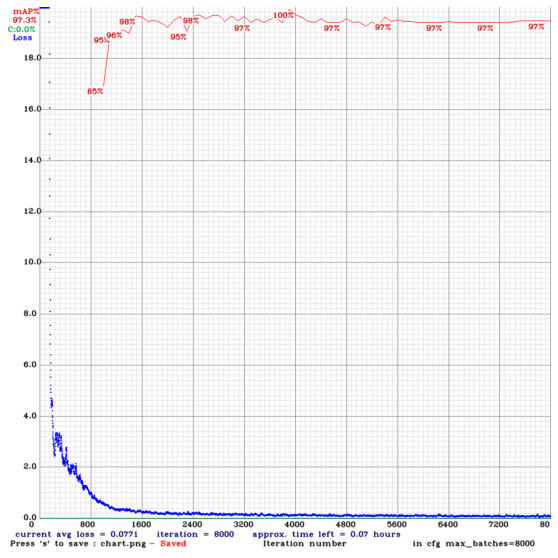

In [ ]:
#can check the performance of all the trained weights by looking at the chart.png file. However, the chart.png file only shows results if the training does not get interrupted i.e. if you do not get disconnected or lose your session. If you restart training from a saved point, this will not work.
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

**Testing The Trained Model**

Please Note - If you only want to test the model for already trained weights refer to Part 2(b) link provided in the start of this Notebook.

Make sure you are inside the darknet folder before running the code. Check with command pwd. If not inside darknet folder navigate to the folder using cd command

For Images

In [5]:
#For Image - This code is for testing images on the trained weight.
# You can use the traine weight file which has the highest mAP (mean average precision). 
# Ideally, for this model there is no significant change after 3000 weights , refer chart above. In this case I have used 7000 weights for testing.
# You can also Try for different trained weights  whatever gives best results

img_path = "/content/gdrive/MyDrive/Traffic_Sign_Detection_YOLOv4/Test_Images_Model_NeverSeen/testimage9.jpg"
!./darknet detector test cfg/ts_data.data cfg/yolov4_ts_test.cfg {backup_file}/yolov4_ts_train_7000.weights {img_path} -dont-show

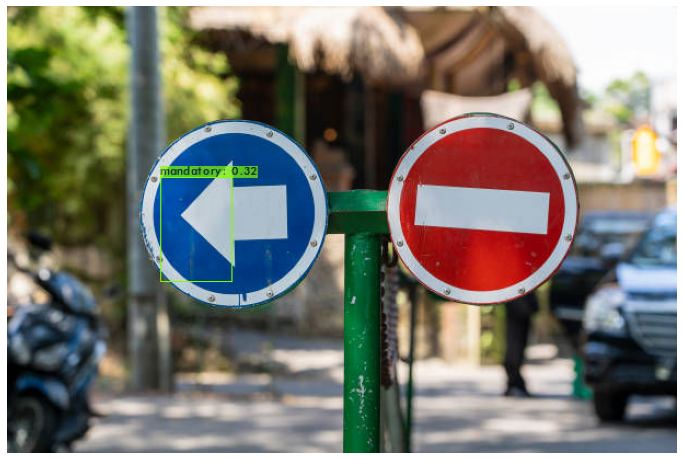

In [ ]:
#Displays the tested image
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

#For video

Make sure you are inside the darknet folder before running the code. Check with command pwd. If not inside darknet folder navigate to the folder using cd command

In [ ]:
pwd

'/content/gdrive/MyDrive/yolov4_traffic_sign_detection/darknet'

In [6]:
video_path = "/content/video3.mp4" # Provide path where the vide file is . In this case it is uploaded during runtime.
!./darknet detector demo cfg/ts_data.data cfg/yolov4_ts_test.cfg {backup_file}/yolov4_ts_train_7000.weights {video_path} -out_filename data/results1.avi -dont_show
# The -out_filename data/results1.avi gives the path where the output video of the Tested model is stored. Here it is stored inside the data folder which is inside darknet folder.
# Specify any path which you like.